In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker

In [2]:
dir = '/work/mh0033/m301036/LSAT/Data/ERA5/'

# Read in data
ds = xr.open_dataset(dir+'ERA20C-ERA5_190001-202212.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 360, latitude: 181, time: 488)
Coordinates:
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-08-01
Data variables:
    msl        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-12-10 13:27:24 GMT by grib_to_netcdf-2.14.1: grib_to_n...

In [3]:
ds = ds.astype(np.float64)
# ds['msl'] = ds['msl']/100.0
# ds['msl'].attrs['units'] = 'hPa'
ds


<xarray.Dataset>
Dimensions:    (time: 488, latitude: 181, longitude: 360)
Coordinates:
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-08-01
Data variables:
    msl        (time, latitude, longitude) float64 1.028e+05 ... 1.01e+05
Attributes:
    Conventions:  CF-1.6
    history:      2019-12-10 13:27:24 GMT by grib_to_netcdf-2.14.1: grib_to_n...

In [4]:
#calculate the monthly mean anomalies
ds_clim = ds.groupby('time.month').mean('time')
ds_anom = ds.groupby('time.month') - ds_clim
ds_anom


<xarray.Dataset>
Dimensions:    (longitude: 360, latitude: 181, time: 488)
Coordinates:
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-08-01
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 10 11 12 1 2 3 4 5 6 7 8
Data variables:
    msl        (time, latitude, longitude) float64 1.319e+03 1.319e+03 ... 174.2

In [5]:
ds_anom_rein = ds_anom.reindex(latitude=ds_anom['latitude'][::-1])
ds_anom_rein

<xarray.Dataset>
Dimensions:    (longitude: 360, latitude: 181, time: 488)
Coordinates:
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 88.0 89.0 90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-08-01
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 10 11 12 1 2 3 4 5 6 7 8
Data variables:
    msl        (time, latitude, longitude) float64 -112.6 -112.6 ... 375.8 375.8

In [6]:
slp_anom = ds_anom_rein['msl'].loc['1979-01-01':'2018-12-01',0:90, :]
slp_ds = slp_anom.to_dataset()
slp_ds

<xarray.Dataset>
Dimensions:    (longitude: 360, latitude: 91, time: 480)
Coordinates:
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 0.0 1.0 2.0 3.0 4.0 ... 87.0 88.0 89.0 90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    msl        (time, latitude, longitude) float64 -87.04 -88.08 ... -779.1

In [7]:
# Calculate the linear trend of each season
slp_DJF = slp_ds['msl'].sel(time=slp_ds['time.season']=='DJF')
slp_MAM = slp_ds['msl'].sel(time=slp_ds['time.season']=='MAM')
slp_JJA = slp_ds['msl'].sel(time=slp_ds['time.season']=='JJA')
slp_SON = slp_ds['msl'].sel(time=slp_ds['time.season']=='SON')
slp_DJF, slp_MAM, slp_JJA, slp_SON
slp_SON.min()

slp_ds['slp_DJF_mean'] = slp_DJF.groupby('time.year').mean('time')
slp_ds['slp_MAM_mean'] = slp_MAM.groupby('time.year').mean('time')
slp_ds['slp_JJA_mean'] = slp_JJA.groupby('time.year').mean('time')
slp_ds['slp_SON_mean'] = slp_SON.groupby('time.year').mean('time')
slp_ds

<xarray.Dataset>
Dimensions:       (longitude: 360, latitude: 91, time: 480, year: 40)
Coordinates:
  * longitude     (longitude) float32 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * latitude      (latitude) float32 0.0 1.0 2.0 3.0 4.0 ... 87.0 88.0 89.0 90.0
  * time          (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
    month         (time) int64 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12
  * year          (year) int64 1979 1980 1981 1982 1983 ... 2015 2016 2017 2018
Data variables:
    msl           (time, latitude, longitude) float64 -87.04 -88.08 ... -779.1
    slp_DJF_mean  (year, latitude, longitude) float64 -9.665 -11.09 ... -29.83
    slp_MAM_mean  (year, latitude, longitude) float64 9.009 8.414 ... 101.5
    slp_JJA_mean  (year, latitude, longitude) float64 10.94 11.74 ... -235.0
    slp_SON_mean  (year, latitude, longitude) float64 -20.09 -19.67 ... -87.7

In [8]:
# Calculate the linear trend of each season
# Calculate the linear trend of each season using linregress
from scipy.stats import linregress

def calc_trend(data):
    slope, intercept, r_value, p_value, std_err = linregress(np.arange(len(data)), data)  
    return slope, p_value

slp_ds['slope_DJF'], slp_ds['p_value_DJF'] = xr.apply_ufunc(calc_trend, slp_ds['slp_DJF_mean'], input_core_dims=[['year']], output_core_dims=[[],[]], vectorize=True)
slp_ds['slope_MAM'], slp_ds['p_value_MAM'] = xr.apply_ufunc(calc_trend, slp_ds['slp_MAM_mean'], input_core_dims=[['year']], output_core_dims=[[],[]], vectorize=True)
slp_ds['slope_JJA'], slp_ds['p_value_JJA'] = xr.apply_ufunc(calc_trend, slp_ds['slp_JJA_mean'], input_core_dims=[['year']], output_core_dims=[[],[]], vectorize=True)
slp_ds['slope_SON'], slp_ds['p_value_SON'] = xr.apply_ufunc(calc_trend, slp_ds['slp_SON_mean'], input_core_dims=[['year']], output_core_dims=[[],[]], vectorize=True)
slp_ds


<xarray.Dataset>
Dimensions:       (longitude: 360, latitude: 91, time: 480, year: 40)
Coordinates:
  * longitude     (longitude) float32 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * latitude      (latitude) float32 0.0 1.0 2.0 3.0 4.0 ... 87.0 88.0 89.0 90.0
  * time          (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
    month         (time) int64 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12
  * year          (year) int64 1979 1980 1981 1982 1983 ... 2015 2016 2017 2018
Data variables: (12/13)
    msl           (time, latitude, longitude) float64 -87.04 -88.08 ... -779.1
    slp_DJF_mean  (year, latitude, longitude) float64 -9.665 -11.09 ... -29.83
    slp_MAM_mean  (year, latitude, longitude) float64 9.009 8.414 ... 101.5
    slp_JJA_mean  (year, latitude, longitude) float64 10.94 11.74 ... -235.0
    slp_SON_mean  (year, latitude, longitude) float64 -20.09 -19.67 ... -87.7
    slope_DJF     (latitude, longitude) float64 -0.5756 -0.5501 ... -2.916
    ...            ...
    slope_MAM     (latitude, longitude) float64 0.7097 0.7375 ... -7.755 -7.755
    p_value_MAM   (latitude, longitude) float64 0.2342 0.2138 ... 0.2417 0.2417
    slope_JJA     (latitude, longitude) float64 -0.2809 -0.2868 ... 0.8821
    p_value_JJA   (latitude, longitude) float64 0.7142 0.7093 ... 0.8631 0.8631
    slope_SON     (latitude, longitude) float64 -1.064 -0.9948 ... -5.304 -5.304
    p_value_SON   (latitude, longitude) float64 0.09353 0.1109 ... 0.2195 0.2195

In [9]:
slp_trend = xr.Dataset({
    'DJF': slp_ds['slope_DJF']*41.0,
    'MAM': slp_ds['slope_MAM']*41.0,
    'JJA': slp_ds['slope_JJA']*41.0,
    'SON': slp_ds['slope_SON']*41.0
}, coords={'longitude': slp_ds['longitude'], 'latitude': slp_ds['latitude'], 'season': ['DJF', 'MAM', 'JJA', 'SON']})
slp_trend


<xarray.Dataset>
Dimensions:    (longitude: 360, latitude: 91, season: 4)
Coordinates:
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 0.0 1.0 2.0 3.0 4.0 ... 87.0 88.0 89.0 90.0
  * season     (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    DJF        (latitude, longitude) float64 -23.6 -22.55 ... -119.6 -119.6
    MAM        (latitude, longitude) float64 29.1 30.24 31.95 ... -318.0 -318.0
    JJA        (latitude, longitude) float64 -11.52 -11.76 ... 36.17 36.17
    SON        (latitude, longitude) float64 -43.64 -40.79 ... -217.4 -217.4

In [10]:
sig_ds = xr.Dataset({
    'DJF': slp_ds['p_value_DJF'],
    'MAM': slp_ds['p_value_MAM'],
    'JJA': slp_ds['p_value_JJA'],
    'SON': slp_ds['p_value_SON']
}, coords={'longitude': slp_ds['longitude'], 'latitude': slp_ds['latitude'], 'season': ['DJF', 'MAM', 'JJA', 'SON']})
sig_ds

<xarray.Dataset>
Dimensions:    (longitude: 360, latitude: 91, season: 4)
Coordinates:
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 0.0 1.0 2.0 3.0 4.0 ... 87.0 88.0 89.0 90.0
  * season     (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    DJF        (latitude, longitude) float64 0.418 0.4394 ... 0.6314 0.6314
    MAM        (latitude, longitude) float64 0.2342 0.2138 ... 0.2417 0.2417
    JJA        (latitude, longitude) float64 0.7142 0.7093 ... 0.8631 0.8631
    SON        (latitude, longitude) float64 0.09353 0.1109 ... 0.2195 0.2195

In [11]:
# Extract the trend data for DJF season
trend_DJF_data = slp_trend['DJF']
trend_MAM_data = slp_trend['MAM']
trend_JJA_data = slp_trend['JJA']
trend_SON_data = slp_trend['SON']
trend_SON_data.min(), trend_SON_data.max(), trend_MAM_data.min(), trend_JJA_data, trend_SON_data

(<xarray.DataArray 'SON' ()>
 array(-336.68057893),
 <xarray.DataArray 'SON' ()>
 array(344.9909355),
 <xarray.DataArray 'MAM' ()>
 array(-613.51095753),
 <xarray.DataArray 'JJA' (latitude: 91, longitude: 360)>
 array([[-11.51608574, -11.75875401, -11.66732772, ...,  -9.01085737,
          -9.32419872, -10.38990385],
        [-13.77995793, -13.82041266, -12.49741587, ...,  -9.25041066,
         -10.25841346, -12.31707732],
        [-10.87338742, -10.86746795,  -8.95389623, ...,  -5.59195713,
          -6.96008614,  -9.03155048],
        ...,
        [ 71.20701122,  69.87063301,  68.49802684, ...,  75.05037059,
          73.73994391,  72.44443109],
        [ 62.75492788,  62.01844952,  61.33059896, ...,  64.75374599,
          64.06553486,  63.39514223],
        [ 36.16631611,  36.16631611,  36.16631611, ...,  36.16631611,
          36.16631611,  36.16631611]])
 Coordinates:
   * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
   * latitude   (latitude) float3

In [12]:
sig_DJF_data = sig_ds['DJF']
sig_MAM_data = sig_ds['MAM']
sig_JJA_data = sig_ds['JJA']
sig_SON_data = sig_ds['SON']
sig_DJF_data.min(), sig_DJF_data.max(), sig_MAM_data.min(), sig_JJA_data, sig_SON_data

(<xarray.DataArray 'DJF' ()>
 array(0.00017036),
 <xarray.DataArray 'DJF' ()>
 array(0.99999259),
 <xarray.DataArray 'MAM' ()>
 array(1.48599727e-06),
 <xarray.DataArray 'JJA' (latitude: 91, longitude: 360)>
 array([[0.71421413, 0.70930092, 0.71198274, ..., 0.77105379, 0.7643735 ,
         0.73977554],
        [0.66038258, 0.65931099, 0.68885015, ..., 0.76634341, 0.74231519,
         0.69391201],
        [0.7232846 , 0.72185225, 0.7673646 , ..., 0.85557243, 0.82080982,
         0.76891513],
        ...,
        [0.72182131, 0.72683383, 0.73198052, ..., 0.70741514, 0.71229639,
         0.71714237],
        [0.7604825 , 0.76318118, 0.76571068, ..., 0.75314426, 0.75566447,
         0.75812725],
        [0.86313257, 0.86313257, 0.86313257, ..., 0.86313257, 0.86313257,
         0.86313257]])
 Coordinates:
   * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
   * latitude   (latitude) float32 0.0 1.0 2.0 3.0 4.0 ... 87.0 88.0 89.0 90.0,
 <xarray.DataArray 'SON' (la

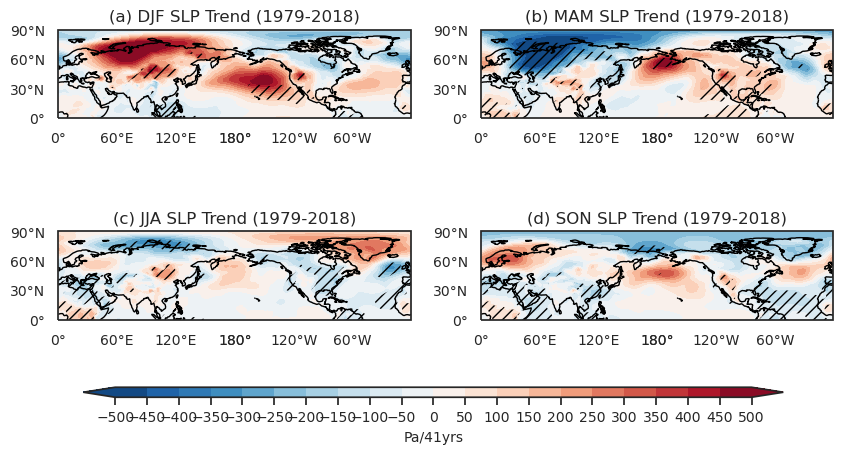

In [13]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from matplotlib.colors import BoundaryNorm, ListedColormap
import seaborn as sns
sns.set_theme(style="white")

# Create a new figure and axis
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(2, 2, figure=fig, wspace=0.2, hspace=0.1) 

# Define the levels and colormap
levels = np.arange(-500.0, 550.0, 50)
cmap = ListedColormap(sns.color_palette("RdBu_r", n_colors=len(levels)-1).as_hex())

sig_levels = np.array([-0.05, 0.05])
sig_cmap = ListedColormap(['none', 'none'])

# Loop through each season and plot the data
for i, season in enumerate(['DJF', 'MAM', 'JJA', 'SON']):
    trend_data = globals()[f'trend_{season}_data']
    sig_data = globals()[f'sig_{season}_data']
    # Create a new subplot for the current season
    ax = fig.add_subplot(gs[i//2, i%2], projection=ccrs.PlateCarree(central_longitude=180))
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([0, 30, 60, 90], crs=ccrs.PlateCarree())
    ax.coastlines()
    # ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='white')
    ax.set_title(season, fontsize=10, fontweight='medium')
    
    # Plot the trend data for the current season
    trend_contours = ax.contourf(trend_data['longitude'], trend_data['latitude'], trend_data, levels=levels, cmap=cmap, extend='both', transform=ccrs.PlateCarree())

    # Plot the significant test results for the current season
    sig_contours = ax.contourf(sig_data['longitude'], sig_data['latitude'], sig_data, levels=sig_levels, hatches=['', '///'], cmap=sig_cmap, extend='both', transform=ccrs.PlateCarree())
    
    ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())
    ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())
    ax.tick_params(labelsize=10)
    # Remove x label for upper plots and y label for right plots
    if i in [0, 1]:
        ax.set_xlabel('')
    if i in [1, 3]:
        ax.set_ylabel('')
    # Set the title of the plot
    plt.title(f'({chr(97+i)}) {season} SLP Trend (1979-2018)')

# Add a colorbar to the figure for trend values
trend_cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])
trend_cbar = fig.colorbar(trend_contours, cax=trend_cbar_ax, orientation='horizontal', ticks=levels)
trend_cbar.ax.tick_params(labelsize=10)
trend_cbar.set_label('Pa/41yrs', fontsize=10)

# Save the figure
plt.savefig('seasonal_slp_trend_pattern.png', dpi=300, bbox_inches='tight')
plt.show()
